## Imports

In [1]:
from v2.env import GymLinearEnv, PreprocessLinearEnv
from v2.features import aggregate, tab2lin
from v2.agents import qlearning
from v2.utils import compose, linear_decay_clip
import v2.plot as Plot
from v2.interact import test_env
import v2.policies as P
import numpy as np
from bentobox.mountaincar import BentoMountainCarEnv

## Load Environment

In [2]:
env = BentoMountainCarEnv()
lows, highs = env.lows, env.highs
print(f'Number of Features: {env.n_features}')
print(f'Position: [{lows[0]}, {highs[0]}]')
print(f'Velocity: [{lows[1]}, {highs[1]}]')
print(f'Number of Actions: {env.n_actions}')

Client Status: True
Number of Features: 2
Position: [-1.2000000476837158, 0.6000000238418579]
Velocity: [-0.07000000029802322, 0.07000000029802322]
Number of Actions: 3


## Preprocessing - Feature Construction

In [3]:
intervals = [6, 6]
preprocess = compose(
    aggregate(lows, highs, intervals),
    tab2lin(np.prod(intervals)))
env = PreprocessLinearEnv(env, preprocess)

## Training

In [4]:
hist, qf = qlearning(
    env, discount=0.99, train_ts=int(1e4),
    epsilon=linear_decay_clip(0, 0, 1),
    lr=0.15, nstep=1)

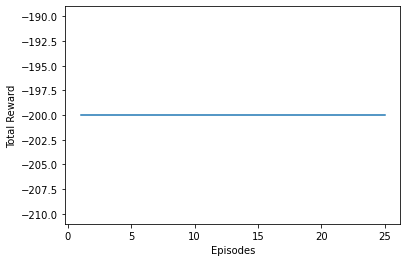

In [5]:
Plot.history(hist)

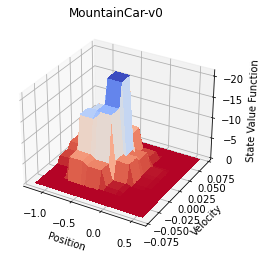

In [6]:
Plot.value_function_2d(
    lambda state: max(qf(preprocess(state))),
    lows, highs, zlabel='State Value Function',
    xlabel='Position', ylabel='Velocity',
    title='MountainCar-v0', invert_z=True)

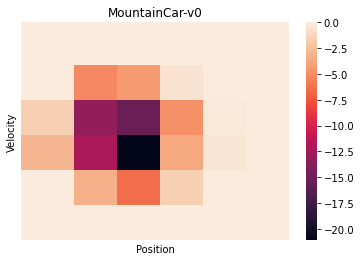

In [7]:
Plot.value_function_2d(
    lambda state: max(qf(preprocess(state))),
    lows, highs, zlabel='State Value Function',
    xlabel='Position', ylabel='Velocity',
    title='MountainCar-v0', heatmap=True)

In [ ]:
test_env(env, P.act_e_greedy(env.rand_action, 0, qf), ts=200)
env.env.env.close()